In [2]:
#Loading in the necessary libraries
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
#Reading in the "adult.data.txt" file
adult_data <- read_delim("data/adult.data.txt", delim=",",col_names=c("age", "workclass", "fnl_wgt","education",
    "education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
    "hrs_per_week","native_country","label"))

head(adult_data)

Parsed with column specification:
cols(
  age = col_double(),
  workclass = col_character(),
  fnl_wgt = col_character(),
  education = col_character(),
  education_num = col_character(),
  marital_status = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  capital_gain = col_character(),
  capital_loss = col_character(),
  hrs_per_week = col_character(),
  native_country = col_character(),
  label = col_character()
)



age,workclass,fnl_wgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,label
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
## Cleaning and Wrangling
adult_tidy <- adult %>%
    mutate(label=as_factor(label), capital_gain = as.numeric(capital_gain), 
           capital_loss = as.numeric(capital_loss), hrs_per_week = as.numeric(hrs_per_week) ) %>%
    filter_all(all_vars(. != " ?")) %>%
    select(age,capital_gain,capital_loss,hrs_per_week,label) 
   
head(adult_tidy)

age,capital_gain,capital_loss,hrs_per_week,label
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,2174,0,40,<=50K
50,0,0,13,<=50K
38,0,0,40,<=50K
53,0,0,40,<=50K
28,0,0,40,<=50K
37,0,0,40,<=50K


`summarise()` ungrouping output (override with `.groups` argument)



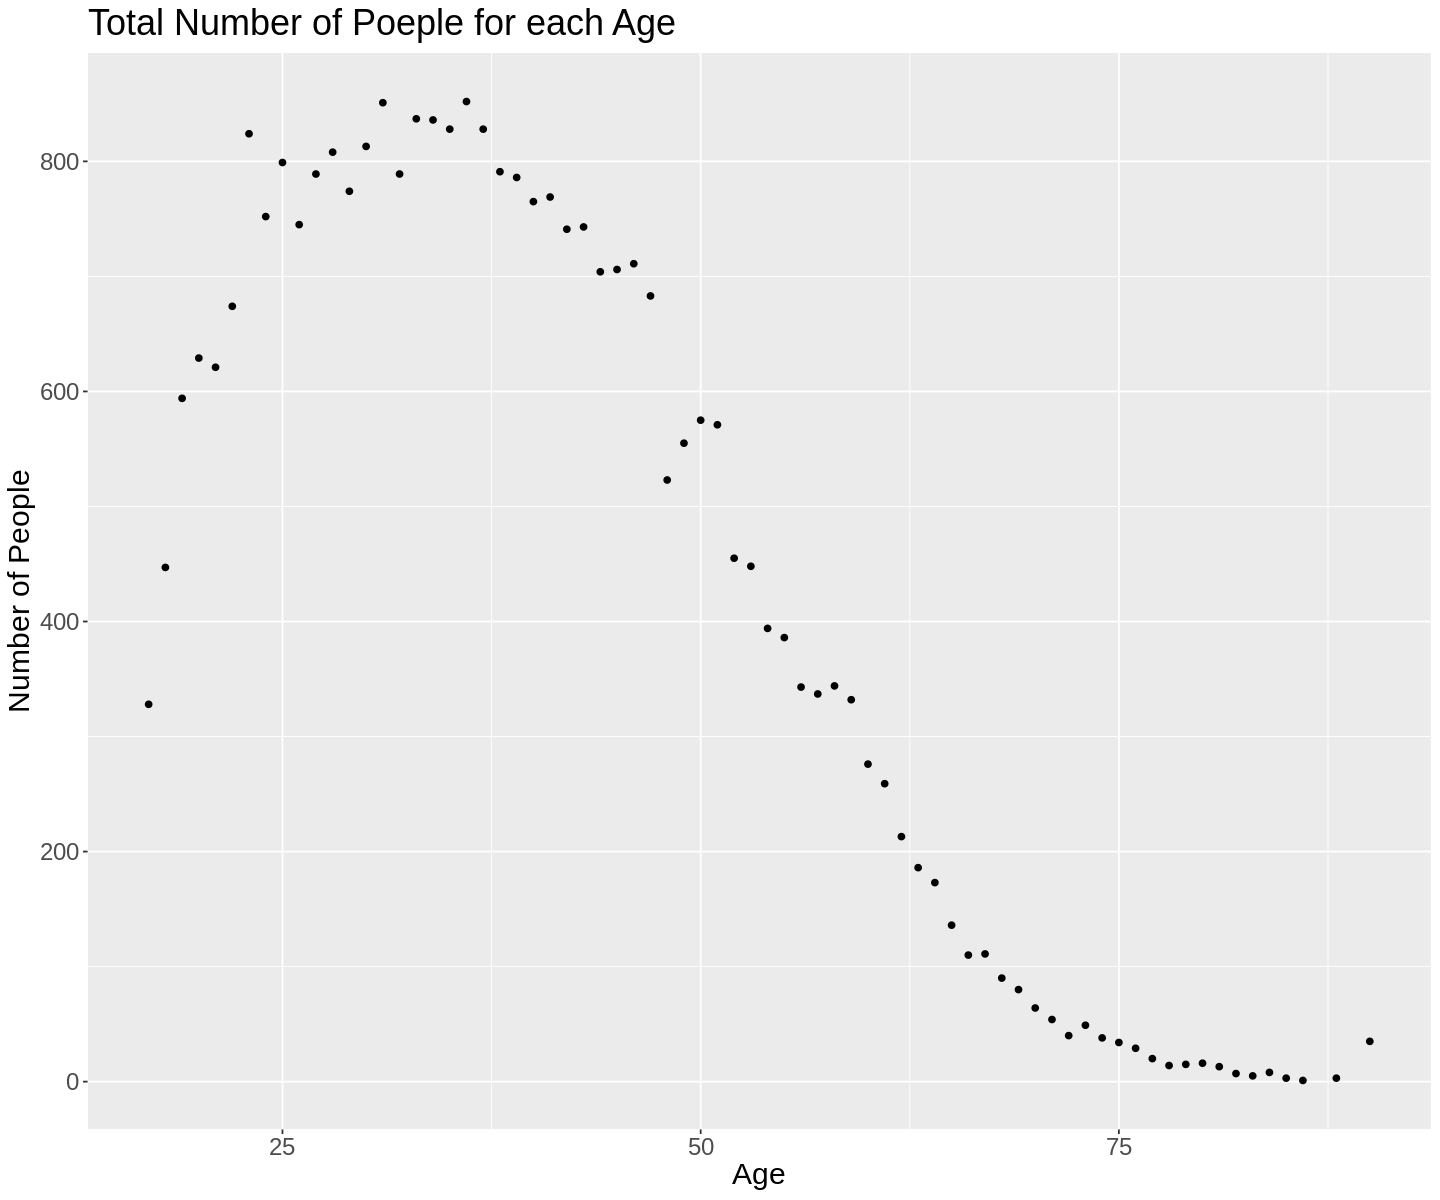

In [31]:
age_distribution <- adult_tidy %>%
    group_by(age) %>%
    summarize(n = n())

options(repr.plot.width = 12, repr.plot.height = 10)
adult_age_distribution <- age_distribution %>%
ggplot(aes(x = age, y = n)) + 
    geom_point() +
    labs(x = "Age", y = "Number of People") +
    ggtitle("Total Number of People for each Age") +
    theme(text = element_text(size = 18))

adult_age_distribution

`summarise()` ungrouping output (override with `.groups` argument)



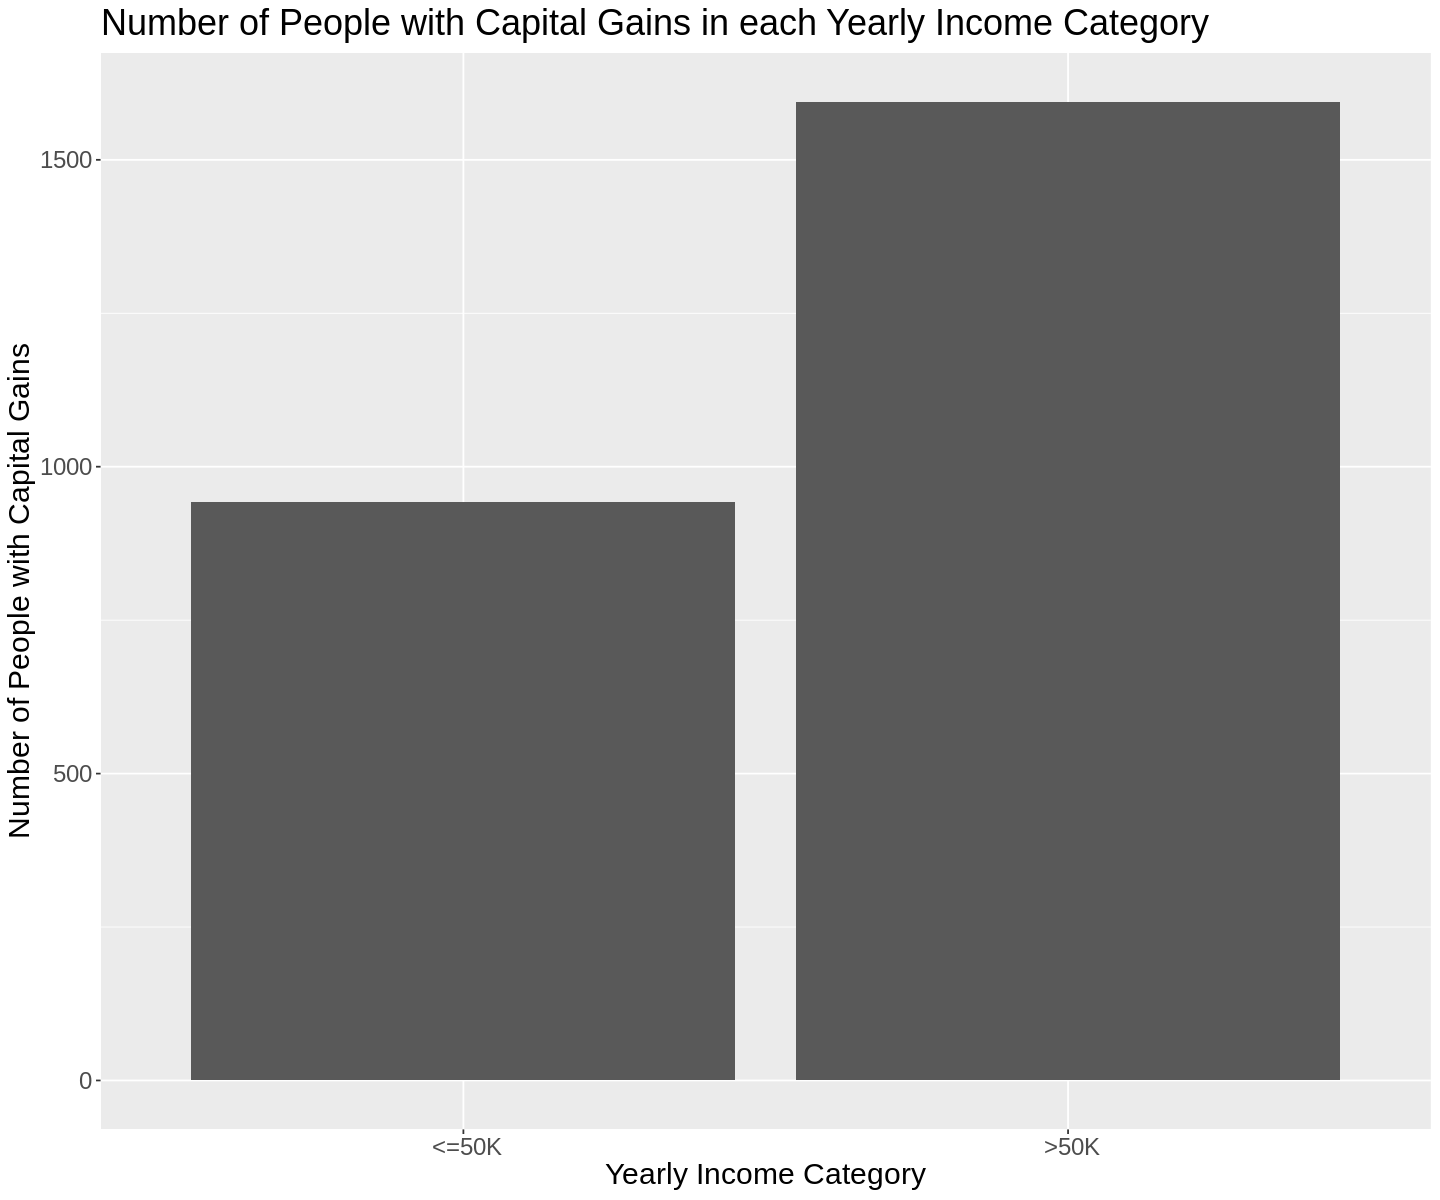

In [29]:
adult_capital_gains <- adult_tidy %>%
    filter(capital_gain > 0) %>%
    group_by(label) %>%
    summarize(n = n())

options(repr.plot.width = 12, repr.plot.height = 10)
adult_bar_chart <- adult_capital_gains %>%
ggplot(aes(x = label, y = n)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Number of People with Capital Gains") +
    ggtitle("Number of People with Capital Gains in each Yearly Income Category") +
    theme(text = element_text(size = 18))

adult_bar_chart

In [19]:
adult_average_cg <- adult_tidy %>%
    filter(capital_gain > 0) %>%
    group_by(label) %>%
    summarize(average = mean(capital_gain))
adult_average_cg

`summarise()` ungrouping output (override with `.groups` argument)



label,average
<fct>,<dbl>
<=50K,3576.926
>50K,18535.486


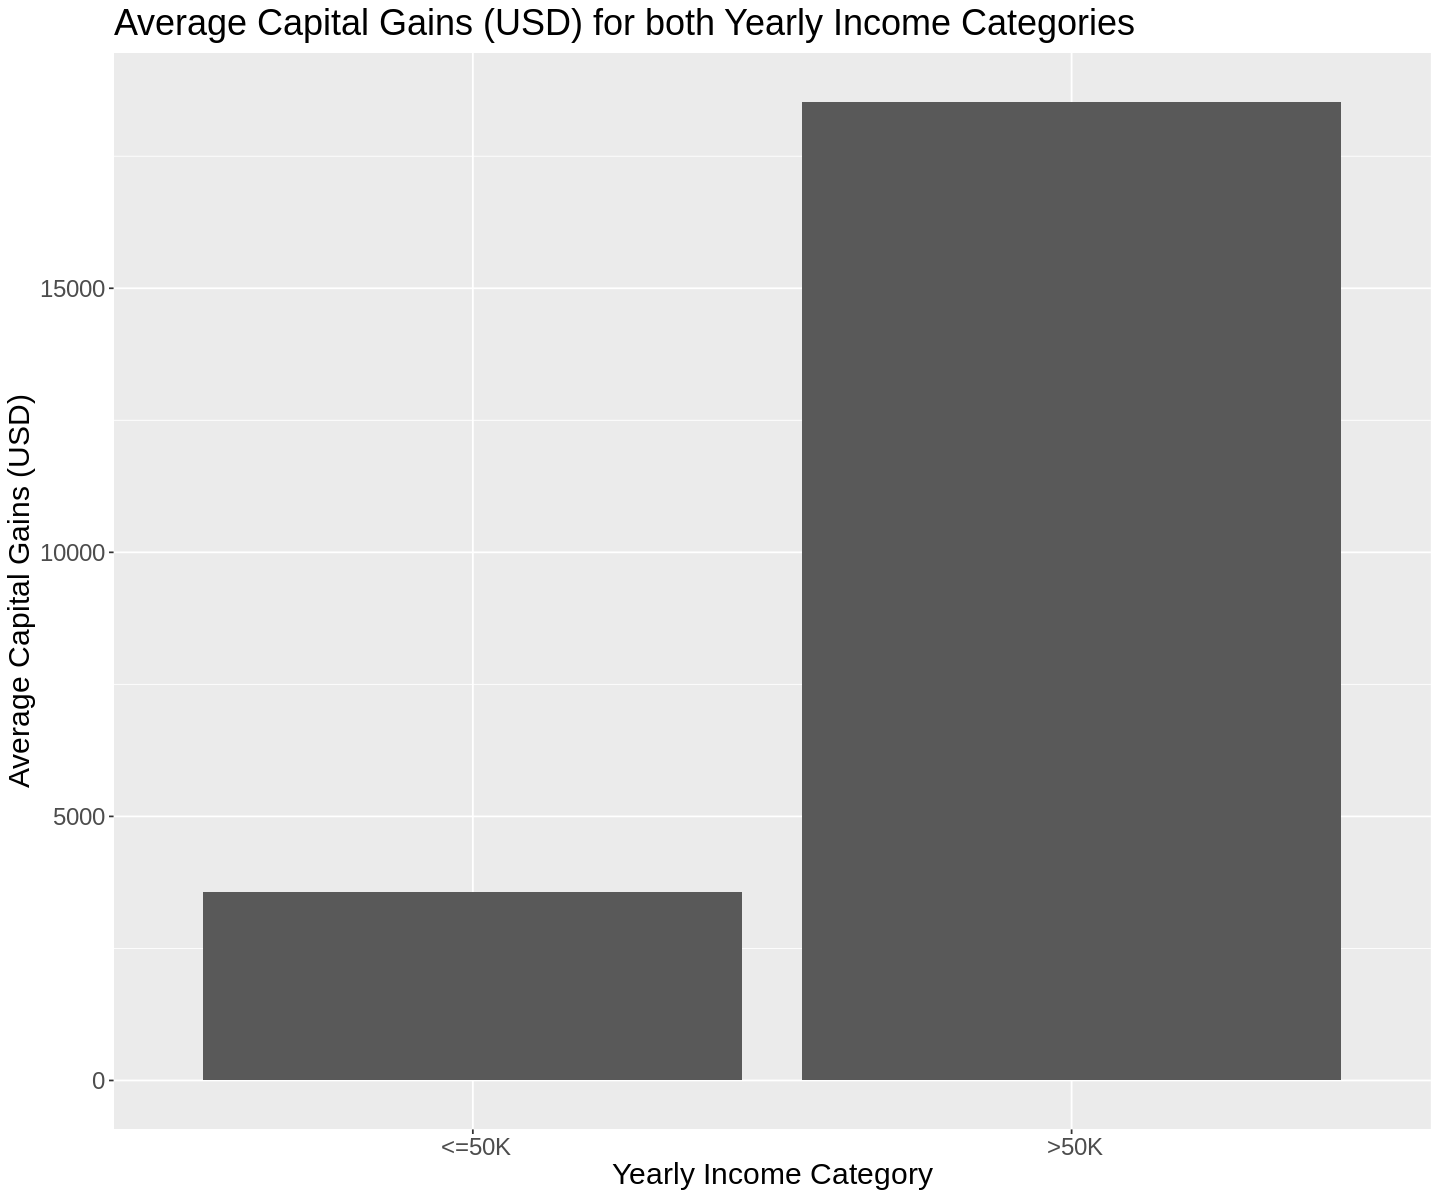

In [28]:
options(repr.plot.width = 12, repr.plot.height = 10)
adult_bar_chart_1 <- adult_average_cg %>%
ggplot(aes(x = label, y = average)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Capital Gains (USD)") +
    ggtitle("Average Capital Gains (USD) for both Yearly Income Categories") +
    theme(text = element_text(size = 18))
adult_bar_chart_1

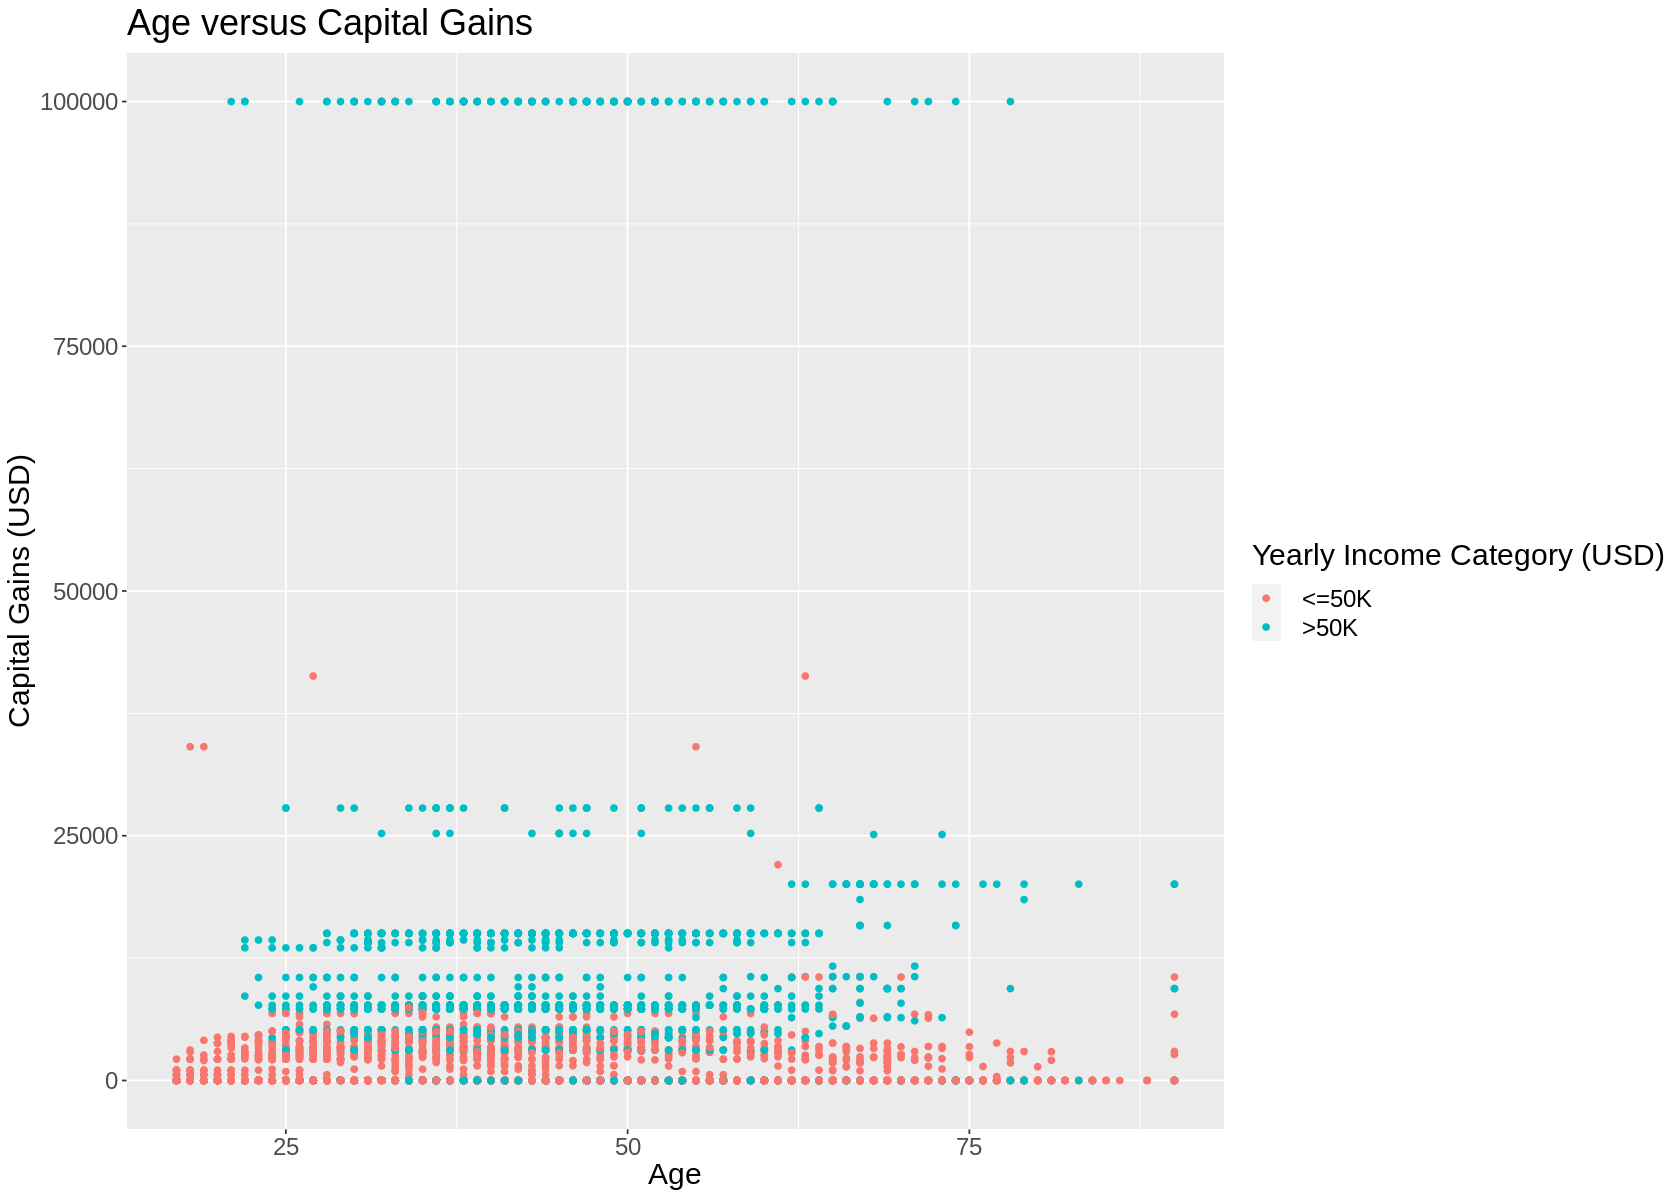

In [26]:
options(repr.plot.width = 14, repr.plot.height = 10)
adult_cg_age <- adult_tidy %>%
ggplot(aes(x = age, y = capital_gain)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Age", y = "Capital Gains (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Age versus Capital Gains") +
    theme(text = element_text(size = 18))
adult_cg_age

In [ ]:
# set up cut-off values 
breaks <- c(0,2,4,6,8,10,12,14,16,18,20)
# specify interval/bin labels
tags <- c("[17-20)","[21-30)", "[4-6)", "[6-8)", "[8-10)", "[10-12)","[12-14)", "[14-16)","[16-18)", "[18-20)")
# bucketing values into bins
group_tags <- cut(v$MeanEducation, 
                  breaks=breaks, 
                  include.lowest=TRUE, 
                  right=FALSE, 
                  labels=tags)
# inspect bins
summary(group_tags)